In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('dataframe_saved_v2.csv', parse_dates = ['Data'], usecols = list(range(0,6)))
df.head()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [9]:
cols = ['Date', 'Distance', 'Time', 'Seconds', 'Minutes', 'Min_per_Km']
df.columns = cols

In [10]:
df.dtypes

Date          datetime64[ns]
Distance             float64
Time                  object
Seconds              float64
Minutes              float64
Min_per_Km           float64
dtype: object

In [4]:
df.sort_index(inplace = True)
df.head()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [11]:
#What is the maximum value of the Minutes column?
df.Minutes.max()

260.71666666666664

In [12]:
#What is the minimum distance value above 2.0?
df.Distance[df.Distance > 2.0].min()

2.01

Text(0, 0.5, 'Distância')

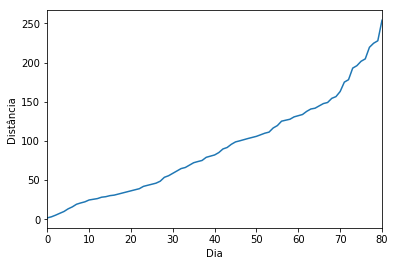

In [7]:
#Create a plot with the cumulative frequency of the Distance 
column.df.Distance.cumsum().plot()
plt.xlabel("Day")
plt.ylabel("Distance")

In [8]:
# What is the day of the week in the zero position index?
df.Data[0].strftime("%A")

'Sunday'

In [9]:
# What is the day of the week in the indexes in the top 5 positions?
df.Date.map(lambda x: x.strftime("%A")).head()

0      Sunday
1      Monday
2     Tuesday
3    Thursday
4      Friday
Name: Data, dtype: object

In [21]:
# Extract every day of the week (in text format) and insert into a new column in the df 
df['Day_Week'] = df.Date.map(lambda x: x.strftime("%A"))

In [22]:
df.head(10)

,Date,Distance,Time,Seconds,Minutes,Min_per_Km,Day_Week
0,2015-08-02,1.70,NaN,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,NaN,Friday
5,2015-08-08,3.40,NaN,NaN,NaN,NaN,Saturday
6,2015-08-09,2.50,NaN,NaN,NaN,NaN,Sunday
7,2015-08-10,3.36,0:28:37,1717.0,28.616667,8.516865,Monday
8,2015-08-11,1.67,0:13:07,787.0,13.116667,7.854291,Tuesday
9,2015-08-12,1.42,0:10:35,635.0,10.583333,7.453052,Wednesday


<AxesSubplot:>

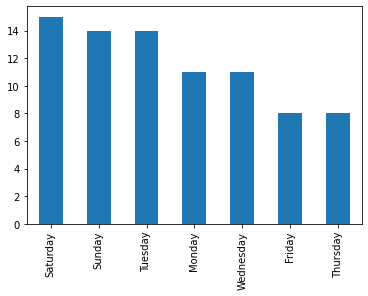

In [23]:
#Create a bar chart with the total distance traveled on each day of the week
df[df.Distance > 0].Day_Week.value_counts().plot(kind = 'bar')

In [25]:
# Delete the Time column of the df 
df.del(df['Time'])

SyntaxError: invalid syntax (<ipython-input-25-9ce6d6d9b948>, line 2)

In [17]:
df.head()

,Date,Distance,Time,Seconds,Minutes,Min_per_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [28]:
#What is the total taxi ride per day of the week?
df['Distance'] = df.Distance[df.Distance > 0]
Days = df.groupby('Day_Week')
Days.size()

Day_Week
Friday        8
Monday       11
Saturday     15
Sunday       14
Thursday      8
Tuesday      14
Wednesday    11
dtype: int64

In [29]:
# What is the average for each of the columns per day of the week?
Days.mean()

,Distance,Seconds,Minutes,Min_per_Km
Day_Week,,,,
Friday,6.315000,5071.800000,84.530000,8.039543
Monday,2.422727,1185.750000,19.762500,7.463840
Saturday,2.786000,1458.500000,24.308333,7.747657
Sunday,3.246429,2802.500000,46.708333,8.184961
Thursday,3.315000,1681.285714,28.021429,7.829348
Tuesday,2.607143,1334.600000,22.243333,7.463291
Wednesday,2.428182,1306.250000,21.770833,7.659706
